source:
https://ixora.io/projects/colorblindness/color-blindness-simulation-research/ <br>
плюс парочку формул поправил

In [2]:
from matplotlib import image, pyplot
import numpy as np

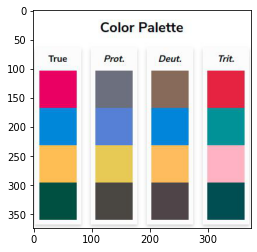

In [27]:
img = image.imread('color.jpg')
pyplot.imshow(img)

In [29]:
def transform_with_matrix(img, matrix):
    shp = img.shape
    img = img.reshape([-1, 3]).T
    img = np.matmul(matrix, img).T
    img = img.reshape(shp)
    return img

def unvec_to_lRGB(num):
    if num < 255 * 0.0404:
        return num / 255 / 12.92
    else:
        return ((num / 255 + 0.055) / 1.055) ** 2.4
    
def unvec_from_lRGB(num):
    if num < 0.00313:
        return max(0, min(int(num * 12.92 * 255), 255))
    else:
        return max(0, min(int(255 * (1.055 * num ** (1 / 2.4) - 0.055)), 255))
    
T = [[0.314, 0.640, 0.046], 
     [0.155, 0.758, 0.087], 
     [0.018, 0.109, 0.873]]

T_inv = np.linalg.inv(T)
    
def from_LMS(img):
    return transform_with_matrix(img, T_inv)

def to_LMS(img):
    return transform_with_matrix(img, T)
    
    
to_lRGB = np.vectorize(unvec_to_lRGB)
from_lRGB = np.vectorize(unvec_from_lRGB)

In [30]:
M_protanopia = [[0, 1.05, -0.05], [0, 1, 0], [0, 0, 1]]

def protanopia(img):
    lms = to_LMS(to_lRGB(img))
    transformed = transform_with_matrix(lms, M_protanopia)
    rgb = from_lRGB(from_LMS(transformed))
    return rgb

In [54]:
M_deuteranopia = [[1, 0, 0], [0.82, 0, 0.18], [0, 0, 1]]

def deuteranopia(img):
    lms = to_LMS(to_lRGB(img))
    transformed = transform_with_matrix(lms, M_deuteranopia)
    rgb = from_lRGB(from_LMS(transformed))
    return rgb

In [32]:
M_tritanopia = [[1, 0, 0], [0, 1, 0], [-0.86, 1.86, 0]]

def tritanopia(img):
    lms = to_LMS(to_lRGB(img))
    transformed = transform_with_matrix(lms, M_tritanopia)
    rgb = from_lRGB(from_LMS(transformed))
    return rgb

In [52]:
M_monochromatism = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

def monochromatism(img):
    lms = to_LMS(to_lRGB(img))
    transformed = transform_with_matrix(lms, M_monochromatism)
    rgb = from_lRGB(from_LMS(transformed))
    return rgb

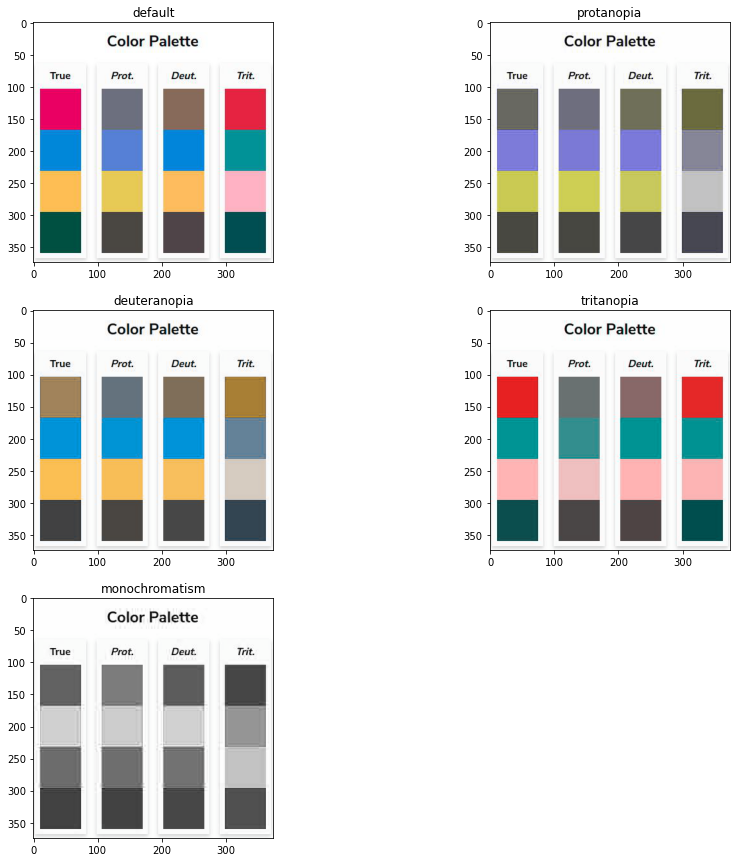

In [55]:
fig = pyplot.figure(figsize=(15, 15))
fig.add_subplot(3, 2, 1).set_title('default')
pyplot.imshow(img)
fig.add_subplot(3, 2, 2).set_title('protanopia')
pyplot.imshow(protanopia(img))
fig.add_subplot(3, 2, 3).set_title('deuteranopia')
pyplot.imshow(deuteranopia(img))
fig.add_subplot(3, 2, 4).set_title('tritanopia')
pyplot.imshow(tritanopia(img))
fig.add_subplot(3, 2, 5).set_title('monochromatism')
pyplot.imshow(monochromatism(img))

Взял с рандомного сайта (https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40) линейки цветов. При какой-либо цветовой слепоте обычная линейка становится равна соответствующей линейке слепоты, а значит симуляция верная. Также если какая-то слепота уже есть, то при повторном наложении фильтра она не меняется.